In [3]:
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2008-01-01", "2026-01-17", auto_adjust=True)
data.head()

Enter the code of the stock: MGC=F


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MGC=F,MGC=F,MGC=F,MGC=F,MGC=F
Date,,,,,
2010-10-04,131.699997,131.699997,131.500000,131.699997,65
2010-10-05,134.000000,134.100006,134.100006,134.100006,193
2010-10-06,134.800003,135.000000,134.100006,134.100006,395
2010-10-19,133.600006,137.000000,132.899994,137.000000,533
2010-10-20,134.399994,134.699997,133.399994,133.399994,214


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yfinance as yf
%matplotlib inline

In [4]:
data.columns = [col[0] if isinstance(col, tuple) else col for col in data.columns]
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-10-04,131.699997,131.699997,131.500000,131.699997,65
2010-10-05,134.000000,134.100006,134.100006,134.100006,193
2010-10-06,134.800003,135.000000,134.100006,134.100006,395
2010-10-19,133.600006,137.000000,132.899994,137.000000,533
2010-10-20,134.399994,134.699997,133.399994,133.399994,214


In [5]:
print(data.shape)
print(data.info())
print(data.describe())

(3835, 5)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3835 entries, 2010-10-04 to 2026-01-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3835 non-null   float64
 1   High    3835 non-null   float64
 2   Low     3835 non-null   float64
 3   Open    3835 non-null   float64
 4   Volume  3835 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 179.8 KB
None
             Close         High          Low         Open         Volume
count  3835.000000  3835.000000  3835.000000  3835.000000    3835.000000
mean   1556.658043  1565.432699  1548.503963  1557.246858   19348.462842
std     764.967852   770.222802   758.907007   764.500308   59604.771372
min     131.699997   131.399994   131.000000   131.300003       0.000000
25%    1234.400024  1241.700012  1229.099976  1235.000000       6.000000
50%    1398.400024  1413.199951  1391.800049  1404.099976     347.000000
75%    1847.400024  1858.300049  1835.2

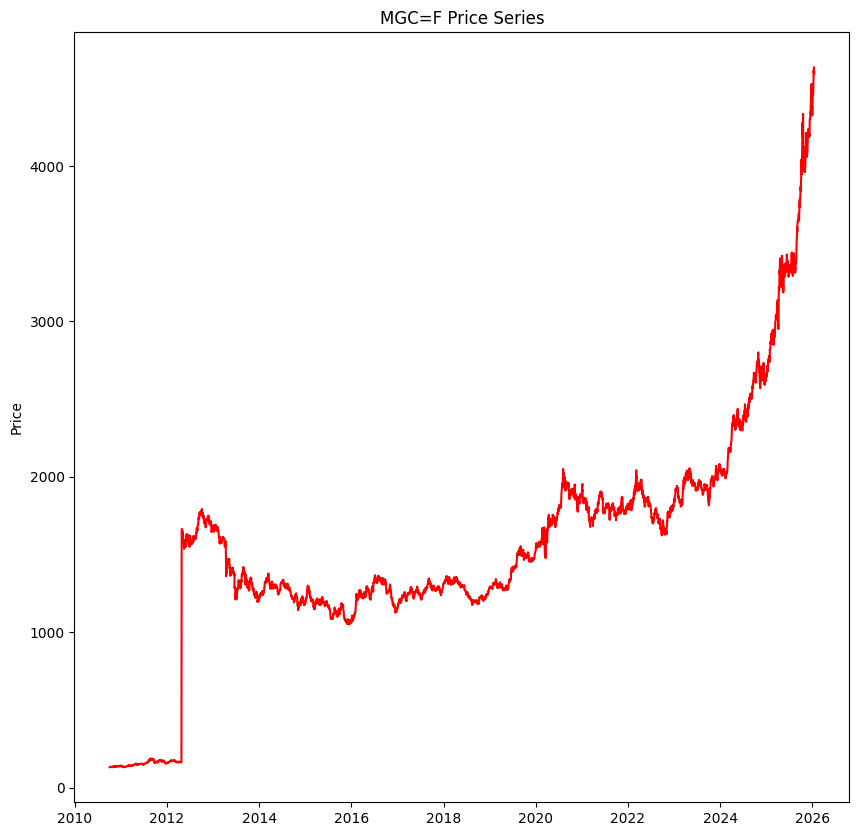

In [6]:
plt.figure(figsize = (10, 10))
plt.plot(data.Close, color = "red")
plt.ylabel("Price")
plt.title("{} Price Series".format(stocks))
plt.show()

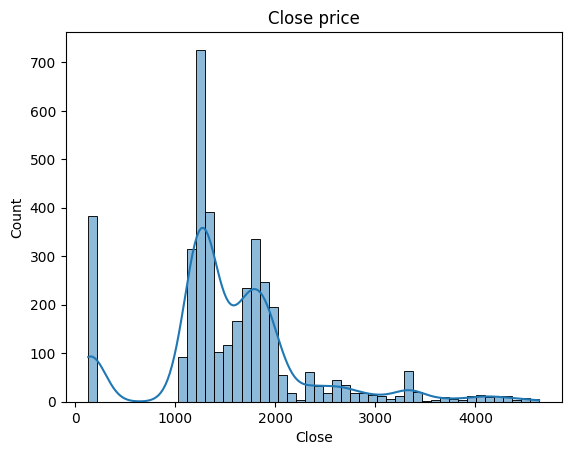

In [7]:
sns.histplot(data["Close"], kde = True, bins = 50)
plt.title("Close price")
plt.show()

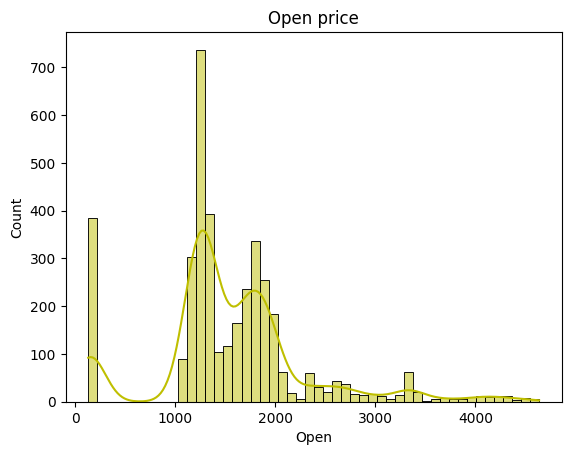

In [8]:
sns.histplot(data["Open"], kde = True, bins = 50, color = "y") #bins: Dữ liệu tách thành bao nhiêu cột
plt.title("Open price")
plt.show()

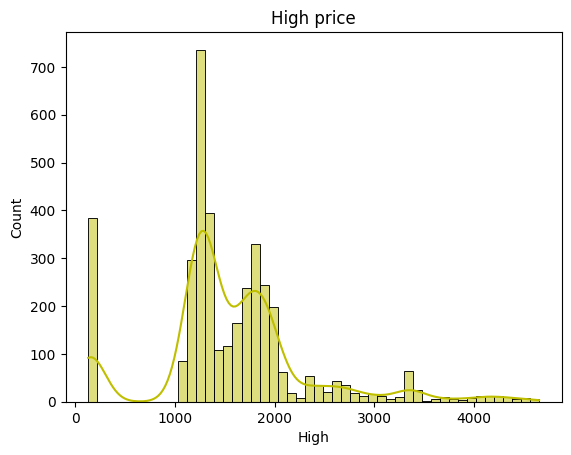

In [9]:
sns.histplot(data["High"], kde = True, bins = 50, color = "y")
plt.title("High price")
plt.show()

In [17]:
X = data.drop("Close", axis = 1)
y = data["Close"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3068, 4)
(767, 4)
(3068,)
(767,)


In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_metrics(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2_scr = r2_score(y_test, y_pred)

  print("MSE: ", mse)
  print("RMSE: ", rmse)
  print("R2_Score: ", r2_scr)

calculate_metrics(y_test, y_pred)

MSE:  42.457393221860784
RMSE:  6.515933795079627
R2_Score:  0.9999262685580942


In [31]:
from sklearn.linear_model import Ridge, Lasso

la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)

y_predLa = la.predict(X_test)
y_predRi = ri.predict(X_test)


In [32]:
calculate_metrics(y_test, y_predLa)

MSE:  80.98579620290535
RMSE:  8.999210865565122
R2_Score:  0.9998593601944253


In [33]:
calculate_metrics(y_test, y_predRi)

MSE:  42.45730178598491
RMSE:  6.5159267787464366
R2_Score:  0.9999262687168816


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.060 total time=   0.9s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.020 total time=   0.4s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.058 total time=   0.4s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.015 total time=   0.4s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.093 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.060 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.020 total time=   0.4s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.057 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.015 total time=   0.4s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.093 total time=   0.4s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.060 total time=   0.4s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;